# 보스톤 집값 데이터셋을 이용한 다중선형회귀 모델 구축 및 평가

## 필요한 모듈


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

####  데이터 수집

In [3]:
#데이터셋을 로드
from sklearn.datasets import load_boston

boston = load_boston()

####  데이터 이해

In [4]:
#데이터셋 정보확인
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

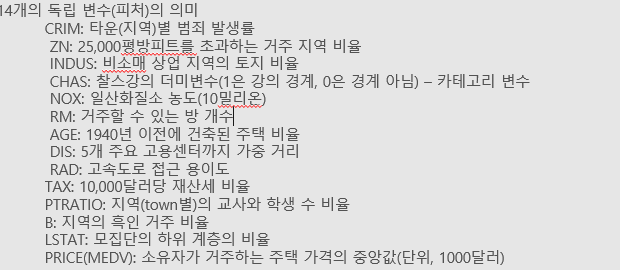

In [6]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [7]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환 - 시각화에 좋음

In [8]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# boston_df생성
# boston_df.head() 데이터 5개 확인

boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# 데이터셋 객체의 target배열(boston.target)을 종속 변수인 주택 가격("PRCIE") 컬럼으로 추가

boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
#데이터의 크기와 형태를 확인
boston_df.shape #(sample,column)

(506, 14)

In [11]:
# 데이터프레임 정보
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### 데이터 이해:  데이터 선정 및 분포 정보 확인

In [12]:
# CHAS : 찰스강변 데이터 - 연속형 값이 아닌 카테고리형 , 분석 대상에 제외한다.
boston_df.drop(['CHAS'],axis=1,inplace=True)
boston_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


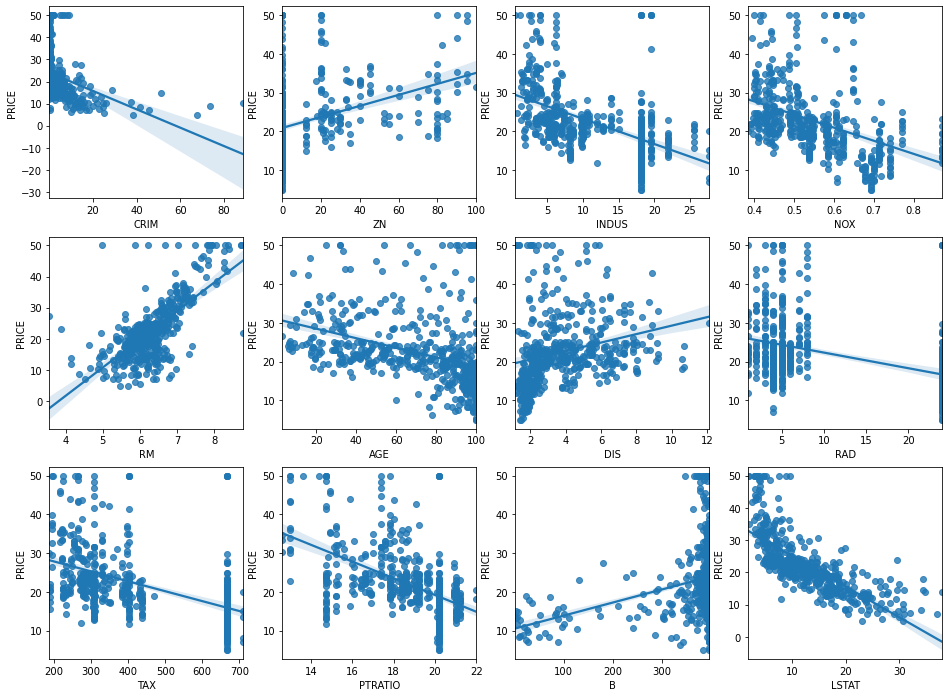

In [16]:
# 독립변수와  종속변수와의 관계에 대한 산점도 시각화

import matplotlib.pyplot as plt
import seaborn as sns

# 3행 4열의 subplots을 준비한다(캔버스 작업)
fig,axs = plt.subplots(figsize=(16,12),nrows=3,ncols=4)

x_features = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

for i,feature in enumerate(x_features):
    #현재 subplot의 행, 열 번호 갱신
    row = int(i/4) #column이 4개이므로
    col = i%4
    #산점도와 회귀선 시각화
    sns.regplot(x=feature,y="PRICE",data=boston_df,ax=axs[row][col])

- 상관계수 : -1 ~ 1 
    - 1에 가까울 수록 양의 상관 관계/ -1 일 수록 음의 상관 관계
    - 0에 가까울 수록 두 변수 간의 선형적 관계가 없다고 봄  
    
  
- 결정 계수 (R-squred) : 0~1 (상관계수의 제곱)
    - 단순회귀분석
    - 회귀 직선의 적합도, 종속 변수에 대한 설명 변수들의 설명력을 알기 위함
    - 결정계수가 R2= 0.45일 때, 온도에 따른(독립변수) 맥주 판매량(종속변수) 가 45%정도로 설명 가능함.
    
    
- 수정된 결정계수
    - 다중회귀분석
    - 독립변수 개수가 많아질수록 결정계수가 커진다. 
    - 따라서, 종속변수의 변동을 잘 설명하지 못하지만, 끼게 되면 결정계수값이 커질 수 있다.
    - 이러한 문제를 해결하기 위해, 표본의 크기와 독립변수의 수를 고려하여 계산한다. 

### 컬럼 별로 독립변수간의 상관관계 시각화(다중공선성이 의심되는 독립변수들)


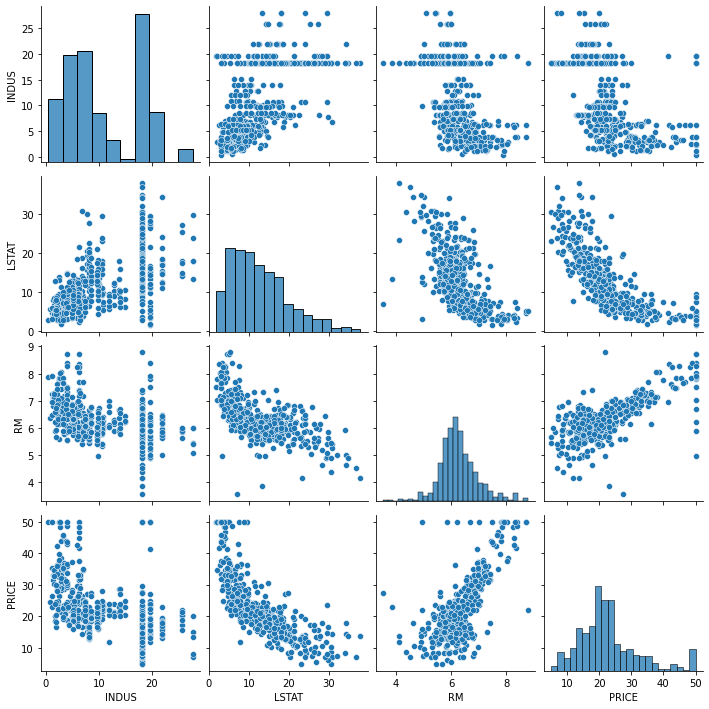

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

#전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다.
ccol = ['INDUS','LSTAT','RM','PRICE']

#pairplot 시각화
sns.pairplot(boston_df[ccol])

#또는 매개변수로 컬럼들을 직접 선택해서 시각화할 수 있다.
#sns.pairplot(boston_df,vars=ccol)

In [20]:
corrs = boston_df[ccol].corr()
corrs

,INDUS,LSTAT,RM,PRICE
INDUS,1.000000,0.603800,-0.391676,-0.483725
LSTAT,0.603800,1.000000,-0.613808,-0.737663
RM,-0.391676,-0.613808,1.000000,0.695360
PRICE,-0.483725,-0.737663,0.695360,1.000000


In [22]:
# 컬럼 별로 독립변수간의 상관관계 히트맵 시각화
# heatmap()

<AxesSubplot:>

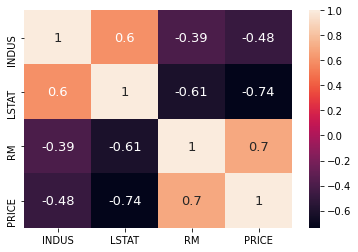

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다.
ccol = ['INDUS','LSTAT','RM','PRICE']

#변수 간의 상관 계수를 구한다.
corrs = boston_df[ccol].corr()

#상관 계수 값에 대한 히트맵
#매개변수 annot: 맵에 값 표시 여부 지정
#매개변수 annot_kws: 표시되는 값에 대한 추가 옵션

sns.heatmap(corrs,annot=True,annot_kws={'size':13})

# 보스턴 집값 다중선형회귀 분석(사이킷런)

### 데이터 준비

In [ ]:
# 데이터 준비, 탐색은 위에서 수행한 것으로 대체

#### 데이터 분할

In [24]:
from sklearn.model_selection import train_test_split

#X(독립변수),Y(종속변수) 분할
X= boston_df.drop(['PRICE'],axis=1)
y= boston_df['PRICE']

#학습용 데이터와 평가용 데이터로 분할하기
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
#X_train 데이터 일부 확인
X_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13


### 모델 클래스 선택

In [30]:
from sklearn.linear_model import LinearRegression

reg= LinearRegression()

### 모델 구축 

In [31]:
#학습 수행
reg.fit(X_train,y_train)

LinearRegression()

### 모델 평가

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = reg.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse,rmse))
print("R2: {:3f}".format(r2))

MSE: 21.697, RMSE: 4.658
R2: 0.708814


In [33]:
# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기
n = len(X_train)

#독립변수의 갯수
k = len(X_train.columns)

# 수정된 결정 계수
adj_r2 = 1-((1-r2)*(n-1) / (n-k-1))

print("Adjusted R2 : {:.4f}".format(adj_r2))

Adjusted R2 : 0.6986


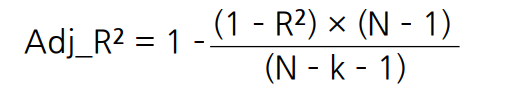

#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [34]:
#ndarray의 실수를 부동 소수점으로 출력
np.set_printoptions(suppress=True)

#회귀 계수와 절편 값 확인

print("Y절편: {:.3f}".format(reg.intercept_))
print("회귀계수:", np.round(reg.coef_,3))

#ndarray의 실수 출력 옵션 복구
np.set_printoptions(suppress=False)

Y절편: 31.428
회귀계수: [ -0.142   0.038   0.073 -14.901   4.146  -0.009  -1.418   0.277  -0.01
  -0.937   0.013  -0.566]


In [35]:
# 사람이 보기 쉽게 독립 변수별로 설명력 보여주기
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦

coef = pd.Series(data = np.round(reg.coef_,3), index=X.columns)

print('y=' + str(reg.intercept_) + '+')

for i,c in zip(coef.index, coef.values):
    print('(' + str(c) + ')*' + str(i))

y=31.4284794823025+
(-0.142)*CRIM
(0.038)*ZN
(0.073)*INDUS
(-14.901)*NOX
(4.146)*RM
(-0.009)*AGE
(-1.418)*DIS
(0.277)*RAD
(-0.01)*TAX
(-0.937)*PTRATIO
(0.013)*B
(-0.566)*LSTAT


###  실제값과 예측값의 분포차이를 시각화

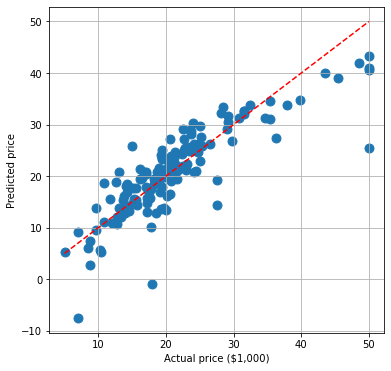

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred,s=80)
plt.plot([5,50],[5,50],c='r', ls= '--')   #1대1함수
plt.xlabel("Actual price ($1,000)")
plt.ylabel("Predicted price")
plt.grid()
plt.show()

# 보스턴 집값: 다중선형회귀 분석(스탯츠모델)

In [ ]:
# 최소 제곱법으로 객체 생성, 학습, 예측, 평가를 진행한다.


# 훈련 데이터로 학습 수행

# 검증 데이터로 예측 수행

#평가 지표 값 확인


# [응용1]: 다중 선형회귀 연습- load_diabetes

### 필요한 모듈 import

### 데이터 수집

In [ ]:
from sklearn.datasets import load_diabetes

diab = load_diabetes()

In [ ]:
### 데이터 이해

### 데이터 준비

In [ ]:
# X(독립변수), Y(종속변수) 분할

# 학습용 데이터와 평가용 데이터로 분할하기


In [ ]:
### 모델 구축

# 회귀 모델 객체 생성


#학습 수행


# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기


### 모델 평가

# [응용2] 캘리포니아 주택 가격

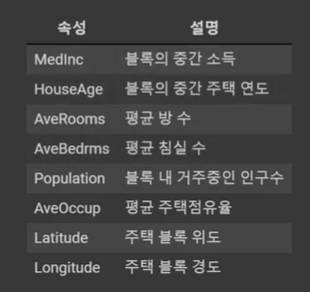

### 데이터 수집 및 탐색

In [ ]:
#fetch data이므로 온라인으로만 fetch가능
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

In [ ]:
# 샘플:20640

In [ ]:
#속성 :8개

# 시각화로 탐색

In [ ]:
# 온라인 아닌경우 :  pd.read_csv('./data/california_dataset.csv')
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Price'] = california.target
california_df.head()

california_df.describe()

In [ ]:
# 종속(price)변수 VS 독립변수(8개)  관계 시각화 탐색


In [ ]:
# 독립변수 간 상관관계 확인

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다


#pairplot 시각화



In [ ]:
# 위경도 데이터 시각화
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12, 10));

california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, s=california_df['Population']/100, \
                   figsize=(12, 10), label='Population', c=california_df['Price'], cmap=plt.get_cmap('viridis'),\
                  colorbar=True);

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#상관 계수 값에 대한 히트맵


In [ ]:
# 선형회귀

# 회귀식으로 표현

# 결과 시각화 ( actual price VS predicted price)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기


# 평가 지표 계산

print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse, rmse))
print("R2: {:3f}".format(r2))

In [ ]:
# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기


#독립변수의 갯수


# 수정된 결정 계수

print("Adjusted R2: {:.4f} ".format(adj_r2))